**Tools - pandas**

*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

* Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

Prerequisites:
* NumPy – if you are not familiar with NumPy, I recommend that you go through the NumPy-Guide now.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/tools_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/tools_pandas.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import `pandas`. People usually import it as `pd`:

In [1]:
from xml.etree.ElementInclude import include

import numpy as np
import pandas as pd

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column or a row in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

## Creating a `Series`
Let's start by creating our first `Series` object!

- **Series from Lists**

In [ ]:
# string
country = ['India','Pakistan','USA','Nepal','Britain' , 'UAE' , 'Oman']

a = pd.Series(country)

    - Hence a series object contains two things index and its value .

In [ ]:
a.dtype

    - data type is object ('O') that is almost equivalent to strings in python .

In [ ]:
# integers
s = pd.Series([2,-1,3,5])
s

In [ ]:
s.dtype

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [ ]:
np.exp(s)

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [ ]:
s + [1000,2000,3000,4000]

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [ ]:
s + 1000

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [ ]:
s < 0

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [ ]:

s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

You can then use the `Series` just like a `dict`:

In [ ]:
s2["bob"]

You can still access the items by integer location, like in a regular array but you must use the `iloc` attribute:
- Accessing s2[1] tries to find the label '1', not the position. Use s2.iloc[1] for position-based access.

In [ ]:
s2.iloc[1]

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [ ]:
s2.loc["bob"]

In [ ]:
s2.iloc[1]

Slicing a `Series` also slices the index labels:

In [ ]:
s2.iloc[1:3]

This can lead to unexpected results when using the default numeric labels, so be careful:

In [ ]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

In [ ]:
surprise_slice = surprise[2:]
surprise_slice

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [ ]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [ ]:
surprise_slice.iloc[0]

- **Naming a series**

In [ ]:
std = pd.Series([56,77,55,78,67,56] , index = ('alice' , 'James' , 'Rahul' ,'Arjun' ,'shantanu','Yukti' ) , name = 'weight of Students' )
std

In [ ]:
# To add a name to the index of a pandas Series, set the index.name attribute:
std.index.name = "students"
std

In [ ]:
print(std.name)             # name of the series
print(std.index.name)       # name of the index

#### Difference Between a series name (weight of Students) and std variable name
- std is a variable name which is used to access the series object whereas 'weight of Students' is a name of the series object which can be accessed by std.name

## Initializing a Series with a `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [ ]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [ ]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

### Series Attributes

In [ ]:
# size
std.size

In [ ]:
# dtype
std.dtype

In [ ]:
# name : name of the series .
std.name

In [ ]:
# index.name : name of the index .
std.index.name

In [ ]:
# is_unique : checks if all the elements in the series are unique or not
std.is_unique

In [ ]:
# index : gives the index of the series .
std.index

In [ ]:
s.index

In [ ]:
# values : gives the values of the series .
std.values

In [ ]:
type(std.values)    # it returns a numpy array .

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [ ]:
s2

In [ ]:
s3

In [ ]:
print(s2.keys())
print(s3.keys())

s2 + s3

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [ ]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Initializing a Series with a Scalar Value
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [ ]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

## Series using read_csv
### With one col

In [2]:
import numpy as np
import pandas as pd

In [6]:
views = pd.read_csv('../DataSets/VideoViewsGrowth.csv')
print(type(views))      # it returns a dataframe object
print(views)

<class 'pandas.core.frame.DataFrame'>
     Views
0       87
1      174
2      289
3      333
4      417
..     ...
145  18210
146  18327
147  18480
148  18644
149  18750

[150 rows x 1 columns]


- So , pd.read_csv() by default returns a dataframe object .
- Now to convert it into a series object we can use `.squeeze()` or use `.iloc[:, 0]` after reading .

In [2]:
views = pd.read_csv('../DataSets/VideoViewsGrowth.csv').squeeze()
print(type(views))  # it returns a series object
print(views)

<class 'pandas.core.series.Series'>
0         87
1        174
2        289
3        333
4        417
       ...  
145    18210
146    18327
147    18480
148    18644
149    18750
Name: Views, Length: 150, dtype: int64


In [3]:
views = pd.read_csv('../DataSets/VideoViewsGrowth.csv').iloc[:, 0]
# can also use .iloc[:, 0] to convert dataframe to series .
print(type(views))  # it returns a series object
print(views)

<class 'pandas.core.series.Series'>
0         87
1        174
2        289
3        333
4        417
       ...  
145    18210
146    18327
147    18480
148    18644
149    18750
Name: Views, Length: 150, dtype: int64


### With 2 cols

In [4]:
VK = pd.read_csv('../DataSets/kohli_ipl.csv')
print(type(VK))
# it returns a dataframe object .
print(VK)

<class 'pandas.core.frame.DataFrame'>
     match_no  runs
0           1     1
1           2    23
2           3    13
3           4    12
4           5     1
..        ...   ...
210       211     0
211       212    20
212       213    73
213       214    25
214       215     7

[215 rows x 2 columns]


In [5]:
VK = pd.read_csv('../DataSets/kohli_ipl.csv', index_col= 0).squeeze()
print(type(VK))
# It returns a series object .
print(VK)

<class 'pandas.core.series.Series'>
match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64


In [6]:
VK = pd.read_csv('../DataSets/kohli_ipl.csv', index_col=0).iloc[:, 0]
print(type(VK))  # it returns a Series object
print(VK)

<class 'pandas.core.series.Series'>
match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64


- As shown, the name of the Series is `runs`, which comes from the heading of the second column in the CSV file. This name is used as the label for the values in the Series.
- The code loads the CSV, sets the first column as the index, and selects the first data column as a Series because of index_col = 0 .

### With 3 col

In [7]:
movies = pd.read_csv('../DataSets/top_500_movies.csv')
print(type(movies)) # it returns a dataframe object .

<class 'pandas.core.frame.DataFrame'>


In [8]:
movies

,Movie Name,Main Lead
0,12 Angry Men,Henry Fonda
1,12 Monkeys,Bruce Willis
2,3 Idiots,Aamir Khan
3,8½,Marcello Mastroianni
4,A Better Tomorrow,Chow Yun-fat
...,...,...
512,You Only Live Twice,Sean Connery
513,Your Name,Ryunosuke Kamiki
514,Zhang Yimou's To Live,Ge You
515,Zindagi Na Milegi Dobara,Hrithik Roshan


In [9]:
# Convert dataframe to series using squeeze() or iloc[:, col_index]
movies_series = pd.read_csv('../DataSets/top_500_movies.csv', index_col=0).squeeze()
print(type(movies_series))  # it returns a series object .
print(movies_series)

<class 'pandas.core.series.Series'>
Movie Name
12 Angry Men                         Henry Fonda
12 Monkeys                          Bruce Willis
3 Idiots                              Aamir Khan
8½                          Marcello Mastroianni
A Better Tomorrow                   Chow Yun-fat
                                    ...         
You Only Live Twice                 Sean Connery
Your Name                       Ryunosuke Kamiki
Zhang Yimou's To Live                     Ge You
Zindagi Na Milegi Dobara          Hrithik Roshan
Zootopia                        Ginnifer Goodwin
Name: Main Lead, Length: 517, dtype: object


In [10]:
movies_series_using_iloc = pd.read_csv('../DataSets/top_500_movies.csv', index_col=0).iloc[:, 0]
print(type(movies_series))  # it returns a series object .
print(movies_series)

<class 'pandas.core.series.Series'>
Movie Name
12 Angry Men                         Henry Fonda
12 Monkeys                          Bruce Willis
3 Idiots                              Aamir Khan
8½                          Marcello Mastroianni
A Better Tomorrow                   Chow Yun-fat
                                    ...         
You Only Live Twice                 Sean Connery
Your Name                       Ryunosuke Kamiki
Zhang Yimou's To Live                     Ge You
Zindagi Na Milegi Dobara          Hrithik Roshan
Zootopia                        Ginnifer Goodwin
Name: Main Lead, Length: 517, dtype: object


In [12]:
movies_series

Movie Name
12 Angry Men                         Henry Fonda
12 Monkeys                          Bruce Willis
3 Idiots                              Aamir Khan
8½                          Marcello Mastroianni
A Better Tomorrow                   Chow Yun-fat
                                    ...         
You Only Live Twice                 Sean Connery
Your Name                       Ryunosuke Kamiki
Zhang Yimou's To Live                     Ge You
Zindagi Na Milegi Dobara          Hrithik Roshan
Zootopia                        Ginnifer Goodwin
Name: Main Lead, Length: 517, dtype: object

- So we have used open_csv to read a csv file and convert it into a series object , that is not its default behaviour .

### Series methods

`head and tail`
- They are used to get a quick overview of the data .

In [ ]:
movies_series.head()    # by default it returns first 5 rows , we can also pass a number to it to get that many rows from top .

In [ ]:
movies_series.head(8)

In [ ]:
movies_series.tail()    # by default it returns last 5 rows , we can also pass a number to it to get that many rows from bottom .

`sample`
- it is used to get a random sample of items from an axis of object when there is some bias in the data .

In [ ]:
movies_series.sample()  # it returns a random row from the series , here also we can pass a number to it to get that many random rows .

`value_counts`
- It helps to get a count of unique values in the series , basically frequency of unique values in the series .


In [ ]:
movies_series.value_counts()

`sort_values`
- It helps to sort the series values in ascending or descending order .

In [ ]:
movies_series.sort_values(ascending= False)   # by default, it sorts in ascending order , here we have set this to false for sorting in descending order .

In [ ]:
VK.sort_values(ascending=False).head(1).values[0]       # This is known as method chaining , where we use multiple methods in a single line of code .
# this gives the maximum runs scored by Virat in an IPL match .

In [ ]:
movies_series.sort_index(ascending=False , inplace=True)    # this will sort the series based on its index labels in descending order and make it permanent using inplace = True argument .

In [ ]:
VK.sort_values(ascending= False)    # this is a temporary sorting , it does not change the original series object .
# To make it permanent we can use inplace = True argument .

In [ ]:
VK = VK.sort_values(ascending= False)       # this is the correct way to make the sorting permanent .
VK

In [ ]:
VK

`sort_index`
- It helps to sort the series based on its index labels .

In [ ]:
VK.sort_values(inplace=True , ascending= False)
# This line attempts to sort the VK Series in place, but the inplace parameter is deprecated for pandas Series. It will raise an error in recent pandas versions. Use assignment instead.

- Be careful while using inplace = True argument as it modifies the original series object and this operation is irreversible .

### Series Maths Methods

`count()`
- It returns the count of non-null values in the series , while in numpy we use .size to get the count of all values including null values .

`sum() and prod()`
- sum() : returns the sum of all non-null values in the series .
- prod() : returns the product of all non-null values in the series .

In [ ]:
VK.count()

In [ ]:
VK.sum()

In [ ]:
VK.prod()

`mean() , median() , mode() , std() and var()`

In [ ]:
print(VK.mean())
print(VK.median())
print(VK.mode())    # it returns a series object containing all the modes in the series .
print(movies_series.mode())   # here we have multiple modes in the series .
print(VK.std())
print(VK.var())

`min() and max()`
- min() : returns the minimum value in the series .
- max() : returns the maximum value in the series .

In [ ]:
print(VK.min())
print(VK.max())

`describe()`
- It returns a summary of multiple maths methods at once .

In [ ]:
VK.describe()

### Series Indexing
- integer indexing

In [ ]:
x = pd.Series([12,13,14,35,46,57,58,79,9])
# positive indexing
x[2]

In [ ]:
# negative indexing
x[-2]

- Negative indexing does not work in pandas series as it does in numpy arrays and python lists , we can use .iloc attribute to access elements using negative indexing .

In [ ]:
x.iloc[-2]

In [ ]:
movies.iloc[0] # iloc is used for integer based indexing , it stands for integer location .

In [ ]:
movies_series.iloc[-3]

In [ ]:
movies_series['3 Idiots']

### Series slicing

In [ ]:
VK[5:11]

In [ ]:
VK[::50]

In [ ]:
VK[-7:]

### fancy indexing in series

In [ ]:
VK[[1,2,7,5,12,37,39]]

In [ ]:
type(movies)

In [ ]:
movies['3 Idiots']
# not working because it is a dataframe not a series .

In [ ]:
# indexing with label , here label means custom index of the series object .
movies_series['John Wick: Chapter 2']

### Editing Series

In [ ]:
std

In [ ]:
std.iloc[0] = 86

In [ ]:
std

In [ ]:
std['shantanu'] = 71

In [ ]:
std

In [ ]:
# what if an index does not exist
std['eve'] = 90

In [ ]:
std

In [ ]:
# Then a new index is created with the given value .
# if we read like std['emma'] it will give an error as there is no index named emma in the series , whereas std['eve'] = 90 created a new index eve in the series .

In [ ]:
# we can also use slicing to edit multiple values at once .
a = pd.Series([12,35,76,23,97,35,64])

In [ ]:
a[0:2] = 100

In [ ]:
a

In [ ]:
a[0::2] = 50

In [ ]:
a

In [ ]:
a[0:3] = [67,77,87]

In [ ]:
a

In [ ]:
# fancy indexing also works
a[[0,3,4]] = [52,312,653]

In [ ]:
a

In [ ]:
movies_series.sample(10)

In [ ]:
# using index label
movies_series['Bahubali: The Beginning'] = 'Anushka Shetty'
movies_series['Bahubali: The Beginning']

### Series with Python Functionalities

In [ ]:
# len(): Returns the number of elements in the Series.
print(len(VK) , "\n")  # Example usage

# type(): Returns the type of the object.
print(type(VK) , "\n")  # Example usage

# dir(): Lists all attributes and methods of the object.
print(dir(VK) , "\n")  # Example usage

# sorted(): Returns a sorted list of the Series values, as it gives output in the form of list , not a series object . hence we don't use sorted instead we use sort_values() method of series .
print(sorted(VK) , "\n")  # Example usage

# min(): Returns the minimum value in the Series.
print(min(VK) , "\n")  # Example usage

# max(): Returns the maximum value in the Series.
print(max(VK) , "\n")  # Example usage

type conversion

In [ ]:
print("list : ", list(std),"\n")
print("Dictionary : ", dict(std),"\n")

membership operator
- by default, it works indexes .

In [ ]:
'Gladiator' in movies_series

In [ ]:
'Aamir Khan' in movies_series
# false because it only searched on indexes .

In [ ]:
# use .values to search on values .
'Aamir Khan' in movies_series.values

looping
- by default it works on values

In [ ]:
for i in movies_series:
  print(i)

In [ ]:
# To print index use .index :
for i in movies_series.index:
  print(i)

Arithmetic Operators(Broadcasting)
- broadcasting since we are using only one scalar .

In [ ]:
100 + std   # we can use + , - , * , / , ** , %

In [ ]:
# Relational Operators
VK >= 20

In [ ]:
VK != 50

### Boolean Indexing on Series

In [ ]:
# Find no of 50's and 100's scored by kohli
VK[VK >= 50].size

In [ ]:
# find number of ducks
VK[VK == 0].size

In [ ]:
# find actors who have done more than 4 movies
num_movies = movies_series.value_counts()
num_movies[num_movies > 4]

## Some important Series methods

`astype()`
- it is used to convert the datatype of the series to the desired datatype .

In [ ]:
import sys
sys.getsizeof(VK)

In [ ]:
VK = VK.astype('int16')

In [ ]:
sys.getsizeof(VK)

In [ ]:
VK.dtype

`between()`
- it is used to filter the series values between two given values (inclusive of both the values) .

In [ ]:
mask = VK.between(51 , 99)

In [ ]:
VK[mask].size

`clip()`
- it is used to limit the values in the series to a given range .
- values below the lower limit are set to the lower limit , and values above the upper limit are set to the upper limit .

In [ ]:
VK.clip(lower=50 , upper=100)

`drop_duplicates()`
- it is used to remove duplicate values from the series .
- here we have the flexibility to delete the first occurrence or the last occurrence of the duplicate values using keep argument , by default it keeps the first occurrence .

In [ ]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,8,9,9,9,0,1])
temp

In [ ]:
temp.drop_duplicates(keep='last')

In [ ]:
movies_series.drop_duplicates()
# so now all the actors have one movie and total count is reduced from 517 to 328 .

`duplicated()`
- checks if values are duplicated or not .

In [ ]:
temp.duplicated()
# false means not duplicated whereas true means duplicated .

In [ ]:
# can also get the no. by adding sum() it basically adds all true so total duplicates .
temp.duplicated().sum()

`count() and size`
- count function v/s size attribute .
    - count function will only count non-nan values .
    - size attribute also counts nan values .

In [ ]:
t = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
t

In [ ]:
t.count()

In [ ]:
t.size

`isnull()`
- returns a boolean after checking the complete dataset that whether it's null or not .

In [ ]:
t.isnull()

In [ ]:
t.isnull().sum()

`dropna()`
- it is used to drop all the nan values.

In [ ]:
t.dropna()

`fillna()`
- it is used to fill the nan values .

In [ ]:
t.fillna(0)

In [ ]:
t.fillna(t.mean())  # so it is filled with the mean of data .

`isin()`
- it helps us to check multiple conditions in one go .

In [ ]:
# normal way : to check if vk got out on 49 or 99 .
VK[(VK == 49) | (VK == 99)]

In [ ]:
# using isin()
VK[VK.isin([49,99])]

`apply()`
- it helps us to apply our custom logic .

In [ ]:
movies_series

In [ ]:
# we want only initial name that too in capital letters of an actor .
movies_series.apply(lambda x:x.split()[0].upper())

In [ ]:
VK.mean()

In [ ]:
# now good day when scored more than mean else bad day .
VK.apply(lambda x : "Good Day" if x > VK.mean() else  "Bad Day")

`copy()`
- it helps us in creating a copy of our original data .

In [ ]:
new = VK.head()

In [ ]:
# now if we change match 1 runs of new to 100 .
new[1] = 100

In [ ]:
new

In [ ]:
VK

- now we can see that our original data is also changed in VK , so when we so head() , nail() they don't produce copy they gives us a view of original data that once edited will also effect our original data .

In [ ]:
VK[1] = 1

In [ ]:
# so instead do this

In [ ]:
new_copy = VK.head().copy()

In [ ]:
new_copy

In [ ]:
new_copy[0:3] = 100

In [ ]:
new_copy

In [ ]:
VK

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out my matplotlib-Guide). Just import matplotlib and call the `plot()` method:

In [ ]:
import matplotlib.pyplot as plt
views.plot()

In [ ]:
movies_series.value_counts().head(15).plot(kind='bar')

In [ ]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on August 24th 2025 at 5:30pm.

In [ ]:
dates = pd.date_range('2025/08/24 5:30pm', periods=12, freq='h')
dates

In [ ]:
temp_series = pd.Series(temperatures, dates)
# type(temp_series)
temp_series

This `DatetimeIndex` may be used as an index in a `Series`:

Let's plot this series:

In [ ]:
temp_series.plot(kind="bar")
plt.grid(True)
plt.show()

## Resampling
Pandas lets us resample a time series very simply. Just call the `resample()` method and specify a new frequency:

In [ ]:
temp_series_freq_2H = temp_series.resample("2h")
temp_series_freq_2H

The resampling operation is actually a deferred operation, which is why we did not get a `Series` object, but a `DatetimeIndexResampler` object instead. To actually perform the resampling operation, we can simply call the `mean()` method: Pandas will compute the mean of every pair of consecutive hours:

In [ ]:
temp_series_freq_2H = temp_series_freq_2H.mean()

Let's plot the result:

In [ ]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [ ]:
temp_series_freq_2H = temp_series.resample("2h").min()
temp_series_freq_2H

Or, equivalently, we could use the `apply()` method instead:

In [ ]:
temp_series_freq_2H = temp_series.resample("2h").apply(np.min)
temp_series_freq_2H

## Upsampling and interpolation
This was an example of downsampling. We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [ ]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [ ]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

In [ ]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

## Timezones
By default datetimes are *naive*: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize()` method:

In [ ]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

Note that `-04:00` is now appended to all the datetimes. This means that these datetimes refer to [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) - 4 hours.

We can convert these datetimes to Paris time like this:

In [ ]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

You may have noticed that the UTC offset changes from `+02:00` to `+01:00`: this is because France switches to winter time at 3am that particular night (time goes back to 2am). Notice that 2:30am occurs twice! Let's go back to a naive representation (if you log some data hourly using local time, without storing the timezone, you might get something like this):

In [ ]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

Now `02:30` is really ambiguous. If we try to localize these naive datetimes to the Paris timezone, we get an error:

In [ ]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

Fortunately using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [ ]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

## Periods
The `pd.period_range()` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [ ]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

Adding a number `N` to a `PeriodIndex` shifts the periods by `N` times the `PeriodIndex`'s frequency:

In [ ]:
quarters + 3

The `asfreq()` method lets us change the frequency of the `PeriodIndex`. All periods are lengthened or shortened accordingly. For example, let's convert all the quarterly periods to monthly periods (zooming in):

In [ ]:
quarters.asfreq("M")

By default, the `asfreq` zooms on the end of each period. We can tell it to zoom on the start of each period instead:

In [ ]:
quarters.asfreq("M", how="start")

And we can zoom out:

In [ ]:
quarters.asfreq("A")

Of course we can create a `Series` with a `PeriodIndex`:

In [ ]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
quarterly_revenue

In [ ]:
quarterly_revenue.plot(kind="line")
plt.show()

We can convert periods to timestamps by calling `to_timestamp`. By default this will give us the first day of each period, but by setting `how` and `freq`, we can get the last hour of each period:

In [ ]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

And back to periods by calling `to_period`:

In [ ]:
last_hours.to_period()

Pandas also provides many other time-related functions that we recommend you check out in the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). To whet your appetite, here is one way to get the last business day of each month in 2016, at 9am:

In [ ]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`

### 1. Using a `lists`
- for this we require a 2D list (list of lists) .

In [13]:
student_data = [
    ["Alice", 8.8, 20],
    ["Bob", 9.2, 19],
    ["Charlie", 7.9, 31],
    ["David", 6.8, 9],
    ["Eva", 8.2, 27]
]

student = pd.DataFrame(student_data , columns=['Name' , 'CGPA' , 'Package(in LPA)'])
student.set_index('Name', inplace=True)  # setting Name as index and making it permanent using inplace = True argument .
student     # set_index() is used to set a particular column as index , it will be discussed later in detail .

,CGPA,Package(in LPA)
Name,,
Alice,8.8,20
Bob,9.2,19
Charlie,7.9,31
David,6.8,9
Eva,8.2,27


### 2. Using a `Dictionary of Series`
- This is the most common way to create a DataFrame.
- Each key-value pair in the dictionary corresponds to a column name and a `Series` object.
- The `Series` can have different lengths, and missing values will be filled with `NaN`.

In [14]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),

### 3. Using `read_csv()`
- We can also create a dataframe using read_csv() function of pandas library .
- By default it returns a dataframe object .
- We can also convert it into a series object using .squeeze() or .iloc[:, col_index] after reading .

In [15]:
movies_df = pd.read_csv('../DataSets/movies.csv')
movies_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [30]:
ipl_matches = pd.read_csv('../DataSets/ipl-matches.csv')
ipl_matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


### DataFrame Attributes and Methods

#### Attributes :

`shape`
- it returns a tuple representing the dimensionality of the DataFrame (rows, columns).

In [6]:
movies_df.shape

(1629, 18)

In [7]:
ipl_matches.shape

(950, 20)

`dtypes`
- it returns the data types of each column in the DataFrame.
- here in case of dataframe object we have multiple columns so it returns a series object containing data types of each column .

In [8]:
movies_df.dtypes

title_x              object
imdb_id              object
poster_path          object
wiki_link            object
title_y              object
original_title       object
is_adult              int64
year_of_release       int64
runtime              object
genres               object
imdb_rating         float64
imdb_votes            int64
story                object
summary              object
tagline              object
actors               object
wins_nominations     object
release_date         object
dtype: object

In [9]:
ipl_matches.dtypes

ID                   int64
City                object
Date                object
Season              object
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
SuperOver           object
WinningTeam         object
WonBy               object
Margin             float64
method              object
Player_of_Match     object
Team1Players        object
Team2Players        object
Umpire1             object
Umpire2             object
dtype: object

`index`
- it returns the index (row labels) of the DataFrame.

In [10]:
movies_df.index

RangeIndex(start=0, stop=1629, step=1)

`columns`
- it returns the column names of the DataFrame in the form of Index object.

In [11]:
movies_df.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

`values`
- it returns the underlying data of the DataFrame as a 2D NumPy array that includes all the rows and columns but it does not include index and column names .

In [15]:
movies_df.values

array([['Uri: The Surgical Strike', 'tt8291224',
        'https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/URI_-_New_poster.jpg/220px-URI_-_New_poster.jpg',
        ...,
        'Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Gautam|Kirti Kulhari|Rajit Kapoor|Ivan Rodrigues|Manasi Parekh|Swaroop Sampat|Riva Arora|Yogesh Soman|Fareed Ahmed|Akashdeep Arora|Kallol Banerjee|',
        '4 wins', '11 January 2019 (USA)'],
       ['Battalion 609', 'tt9472208', nan, ...,
        'Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elena Kazan|Vishwas Kini|Major Kishore|Jashn Kohli|Rammy C. Pandey|Manish Sharma|Sparsh Sharma|Farnaz Shetty|Vikas Shrivastav|Chandraprakash Thakur|Brajesh Tiwari|',
        nan, '11 January 2019 (India)'],
       ['The Accidental Prime Minister (film)', 'tt6986710',
        'https://upload.wikimedia.org/wikipedia/en/thumb/a/a1/The_Accidental_Prime_Minister_film.jpg/220px-The_Accidental_Prime_Minister_film.jpg',
        ...,
        'Anupam Kher|Akshaye Khanna|Aahana Kumra|At

#### Methods :

`head() and tail()`
- they are used to get a quick overview of the data .
- by default they return first/last 5 rows , we can also pass a number to it to get that many rows from top/bottom .

In [19]:
movies_df.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [20]:
movies_df.tail(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)


`sample()`
- it is used to get a random sample of items from an axis of object when there is some bias in the data .

In [21]:
movies_df.sample()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1064,Chhodon Naa Yaar,tt1108831,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Chhodon_Naa_Yaar,Chhodon Naa Yaar,Chhodon Naa Yaar,0,2007,\N,Thriller,4.7,84,Three college friends decide to make the film ...,Three college friends decide to make the film ...,NaN,Jimmy Sheirgill|Kim Sharma|Farid Amiri|Kabir S...,NaN,NaN


In [22]:
movies_df.sample(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
625,Madras Cafe,tt2855648,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Madras_Cafe,Madras Cafe,Madras Cafe,0,2013,130,Action|Drama|Thriller,7.7,21393,An Indian Intelligence agent (portrayed by Joh...,An Indian intelligence agent journeys to a war...,NaN,John Abraham|Nargis Fakhri|Raashi Khanna|Praka...,10 wins & 10 nominations,23 August 2013 (India)
1238,Chehraa,tt0449870,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Chehraa_(2005_film),Chehraa,Chehraa,0,2005,136,Thriller,3.8,112,Reena and fellow collegian Akash Mehta are med...,Reena and fellow collegian Akash Mehta are med...,NaN,Bipasha Basu|Dino Morea|Preeti Jhangiani|Irrfa...,NaN,18 February 2005 (India)
1418,Basti (film),tt0377126,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Basti_(film),Basti,Basti,0,2003,\N,Action|Crime,7.5,26,Unemployed Ramesh Kulkarni resides in 'Bombay'...,Unemployed Ramesh Kulkarni resides in 'Bombay'...,NaN,Sadashiv Amrapurkar|Liyaqat Bari|Brij Gopal|Ra...,NaN,NaN


`info()`
- it is used to get a concise summary of the DataFrame including the index dtype and columns, non-null values and memory usage.

In [25]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

`describe()`
- it is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values .
- by default it only analyzes numeric columns , if we want to analyze all the columns we can use include='all' argument .

In [28]:
ipl_matches.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [27]:
ipl_matches.describe(include='all')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
count,9.500000e+02,899,950,950,950,950,950,950,950,950,946,946,950,932.000000,19,946,950,950,950,950
unique,NaN,33,706,15,80,18,18,49,18,2,2,18,4,NaN,1,262,932,937,58,60
top,NaN,Mumbai,2008-04-20,2013,Final,Royal Challengers Bangalore,Mumbai Indians,Eden Gardens,Mumbai Indians,field,N,Mumbai Indians,Wickets,NaN,D/L,AB de Villiers,"['KL Rahul', 'MA Agarwal', 'CH Gayle', 'DJ Hoo...","['BB McCullum', 'CH Gayle', 'BJ Hodge', 'SC Ga...",AK Chaudhary,S Ravi
freq,NaN,159,2,76,15,126,119,77,123,599,932,131,509,NaN,19,25,2,2,95,83
mean,8.304852e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.056867,NaN,NaN,NaN,NaN,NaN,NaN
std,3.375678e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.633109,NaN,NaN,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.012612e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.297380e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.175372e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN


`isnull()`
- it returns a DataFrame of the same shape as the original DataFrame, but with boolean values indicating whether each element is null (NaN) or not.
- true means null whereas false means not null .
- we can also get the count of null values in each column by adding sum() at the end .
- we can also use isna() method instead of isnull() as both are same .
- we can also use notnull() or notna() method to check non-null values .

In [34]:
movies_df.isnull()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1626,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True
1627,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [36]:
movies_df.isnull().sum()

title_x                0
imdb_id                0
poster_path          103
wiki_link              0
title_y                0
original_title         0
is_adult               0
year_of_release        0
runtime                0
genres                 0
imdb_rating            0
imdb_votes             0
story                 20
summary                0
tagline             1072
actors                 5
wins_nominations     922
release_date         107
dtype: int64

`duplicated()`
- it checks if rows are duplicated or not .

In [38]:
movies_df.duplicated().sum()

np.int64(0)

In [41]:
ipl_matches.duplicated().sum()

np.int64(0)

`rename()`
- it is used to rename the index (row labels) or columns of the DataFrame.
- we can use index= {} or columns= {} argument to specify whether we want to rename index or columns .
- by default it returns a new DataFrame with the updated names, leaving the original DataFrame unchanged. To make the changes permanent, you can use the inplace=True argument.

In [56]:
student

,Student Name,GPA,Package(in LPA)
0,Alice,8.8,20
1,Bob,9.2,19
2,Charlie,7.9,31
3,David,6.8,9
4,Eva,8.2,27


In [53]:
student.rename(columns = {'Name' : 'Student Name' , 'CGPA' : 'GPA'} )

,Student Name,GPA,Package(in LPA)
0,Alice,8.8,20
1,Bob,9.2,19
2,Charlie,7.9,31
3,David,6.8,9
4,Eva,8.2,27


- original dataframe is not changed .
- to make it permanent use inplace = True argument .

In [55]:
student.rename(columns = {'Name' : 'Student Name' , 'CGPA' : 'GPA'} , inplace= True)

### Math Methods

`sum() , mean() , median() , mode() , std() , var()`
- by default, they work on columns (axis=0) , we can also use axis=1 argument to work on rows .
- they only consider numeric columns and ignore non-numeric columns .

In [69]:
student

,Student Name,GPA,Package(in LPA)
0,Alice,8.8,20
1,Bob,9.2,19
2,Charlie,7.9,31
3,David,6.8,9
4,Eva,8.2,27


- sum() :
    - for numeric columns it returns the sum of each column .
    - for non-numeric columns it returns the concatenation of all values in that column .
    - if we want to consider only numeric columns we can use numeric_only=True argument .

In [64]:
# sum :
student.sum()   # sum of each column

Student Name       AliceBobCharlieDavidEva
GPA                                   40.9
Package(in LPA)                        106
dtype: object

- mean() :
    - it returns the mean of each numeric column .
    - if we want to consider only numeric columns we can use numeric_only=True argument .

In [71]:
student.mean(axis=1 , numeric_only=True)

0    14.40
1    14.10
2    19.45
3     7.90
4    17.60
dtype: float64

In [73]:
student.var(numeric_only=True)

GPA                 0.852
Package(in LPA)    71.200
dtype: float64

`min() and max()`
- they return the minimum and maximum value of each column respectively.
- if we want to consider only numeric columns we can use numeric_only=True argument .

In [74]:
student.min()

Student Name       Alice
GPA                  6.8
Package(in LPA)        9
dtype: object

### Selecting cols from a DataFrame

- Single column :
    - we can access a single column using either the column name as an attribute or by using the column name as a key in square brackets.
    - type of the returned object is Series .

In [77]:
movies_df.title_x

0                   Uri: The Surgical Strike
1                              Battalion 609
2       The Accidental Prime Minister (film)
3                            Why Cheat India
4                            Evening Shadows
                        ...                 
1624                   Tera Mera Saath Rahen
1625                    Yeh Zindagi Ka Safar
1626                         Sabse Bada Sukh
1627                                   Daaka
1628                                Humsafar
Name: title_x, Length: 1629, dtype: object

In [78]:
m = movies_df['title_x']
m

0                   Uri: The Surgical Strike
1                              Battalion 609
2       The Accidental Prime Minister (film)
3                            Why Cheat India
4                            Evening Shadows
                        ...                 
1624                   Tera Mera Saath Rahen
1625                    Yeh Zindagi Ka Safar
1626                         Sabse Bada Sukh
1627                                   Daaka
1628                                Humsafar
Name: title_x, Length: 1629, dtype: object

In [79]:
type(m)

pandas.core.series.Series

In [81]:
ipl_matches.WinningTeam

0                   Gujarat Titans
1                 Rajasthan Royals
2      Royal Challengers Bangalore
3                   Gujarat Titans
4                     Punjab Kings
                  ...             
945          Kolkata Knight Riders
946    Royal Challengers Bangalore
947               Delhi Daredevils
948            Chennai Super Kings
949          Kolkata Knight Riders
Name: WinningTeam, Length: 950, dtype: object

- Multiple columns :
    - we can access multiple columns by passing a list of column names to the DataFrame constructor.
    - type of the returned object is DataFrame .

In [82]:
movies_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [87]:
n = movies_df[['title_x' , 'runtime' , 'year_of_release' , 'actors']]   # selecting multiple columns by passing a list of column names to the DataFrame constructor .
n

,title_x,runtime,year_of_release,actors
0,Uri: The Surgical Strike,138,2019,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,Battalion 609,131,2019,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,The Accidental Prime Minister (film),112,2019,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,Why Cheat India,121,2019,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,Evening Shadows,102,2018,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...
...,...,...,...,...
1624,Tera Mera Saath Rahen,148,2001,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...
1625,Yeh Zindagi Ka Safar,146,2001,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...
1626,Sabse Bada Sukh,\N,2018,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...
1627,Daaka,136,2019,Gippy Grewal|Zareen Khan|


In [88]:
type(n)

pandas.core.frame.DataFrame

### Selecting rows from a DataFrame using **iloc** and **loc**

#### 1. **iloc** - searches using index positions :
   - it is used for integer based indexing , it stands for integer location .
   - it accepts only integer values or boolean values .
   - it does not accept index labels or column names .
   - it works on both rows and columns .
   - syntax : df.iloc[row_index , column_index]

- Single row :
    - we can access a single row using either the index position with iloc or the index label with loc .
    - both return a Series object representing the row.

In [93]:
movies_df.iloc[0]

title_x                                      Uri: The Surgical Strike
imdb_id                                                     tt8291224
poster_path         https://upload.wikimedia.org/wikipedia/en/thum...
wiki_link           https://en.wikipedia.org/wiki/Uri:_The_Surgica...
title_y                                      Uri: The Surgical Strike
original_title                               Uri: The Surgical Strike
is_adult                                                            0
year_of_release                                                  2019
runtime                                                           138
genres                                               Action|Drama|War
imdb_rating                                                       8.4
imdb_votes                                                      35112
story               Divided over five chapters  the film chronicle...
summary             Indian army special forces execute a covert op...
tagline             

In [94]:
type(movies_df.iloc[0])

pandas.core.series.Series

- multiple rows :
    - we can access multiple rows by passing a list of index positions to iloc or a list of index labels to loc .
    - both return a DataFrame object representing the selected rows.

In [97]:
movies_df.iloc[0:15:3]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
6,Fraud Saiyaan,tt5013008,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Fraud_Saiyaan,Fraud Saiyaan,Fraud Saiyyan,0,2019,109,Comedy|Drama,4.2,504,Fraud Saiyyan is the story of a con artist in ...,Fraud Saiyyan is the story of a con artist in ...,NaN,Arshad Warsi|Saurabh Shukla|Flora Saini|Sara L...,NaN,18 January 2019 (India)
9,Thackeray (film),tt7777196,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Thackeray_(film),Thackeray,Thackeray,0,2019,120,Biography|Drama,5.1,2301,Balasaheb Thackrey works as a cartoonist for a...,Biographical account of Shiv Sena Supremo Bal...,NaN,Nawazuddin Siddiqui|Amrita Rao|Abdul Quadir Am...,NaN,25 January 2019 (India)
12,Hum Chaar,tt9319812,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Hum_Chaar,Hum chaar,Hum chaar,0,2019,143,Drama,5.6,183,The story of the film revolves around four col...,The story of the film revolves around four col...,NaN,Prit Kamani|Simran Sharma|Anshuman Malhotra|Tu...,NaN,15 February 2019 (India)


In [98]:
# fancy indexing also works
movies_df.iloc[[0,3,5,7,10,12]]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
5,Soni (film),tt6078866,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Soni_(film),Soni,Soni,0,2018,97,Drama,7.2,1595,Soni a young policewoman in Delhi and her su...,While fighting crimes against women in Delhi ...,NaN,Geetika Vidya Ohlyan|Saloni Batra|Vikas Shukla...,3 wins & 5 nominations,18 January 2019 (USA)
7,Bombairiya,tt4971258,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bombairiya,Bombairiya,Bombairiya,0,2019,104,Comedy|Crime|Drama,4.3,295,It follows the story of Meghna who gets embro...,It follows the story of Meghna who gets embro...,They didn't mean to change the world.,Radhika Apte|Akshay Oberoi|Siddhanth Kapoor|Ra...,NaN,18 January 2019 (India)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
12,Hum Chaar,tt9319812,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Hum_Chaar,Hum chaar,Hum chaar,0,2019,143,Drama,5.6,183,The story of the film revolves around four col...,The story of the film revolves around four col...,NaN,Prit Kamani|Simran Sharma|Anshuman Malhotra|Tu...,NaN,15 February 2019 (India)


#### 2. **loc** - searches using index labels :
   - it is used for label based indexing , it stands for location .
   - it accepts only index labels or column names .
   - it does not accept integer values or boolean values .
   - it works on both rows and columns .
   - syntax : df.loc[row_label , column_name]

In [99]:
student

,CGPA,Package(in LPA)
Name,,
Alice,8.8,20
Bob,9.2,19
Charlie,7.9,31
David,6.8,9
Eva,8.2,27


In [100]:
student.loc['Alice']

CGPA                8.8
Package(in LPA)    20.0
Name: Alice, dtype: float64

In [101]:
student.loc['Alice':'David']   # it includes the last index label also unlike iloc where last index position is excluded .

,CGPA,Package(in LPA)
Name,,
Alice,8.8,20
Bob,9.2,19
Charlie,7.9,31
David,6.8,9


- in case of loc , the last index label is included whereas in case of iloc last index position is excluded .

In [103]:
student

,CGPA,Package(in LPA)
Name,,
Alice,8.8,20
Bob,9.2,19
Charlie,7.9,31
David,6.8,9
Eva,8.2,27


- not supported :

In [110]:
student.loc['alice':'Eva':2]

,CGPA,Package(in LPA)
Name,,


- When slicing a DataFrame by labels, you can only specify the start and stop values. Label slicing doesn’t support a step. To skip rows, first select the label range with .loc and then apply a step-based slice with .iloc

In [107]:
# Use .loc to slice by labels then .iloc to take every 2nd row
result = student.loc['Alice':'Charlie'].iloc[::2]
print(result)

         CGPA  Package(in LPA)
Name                          
Alice     8.8               20
Charlie   7.9               31


In [111]:
# fancy indexing also works
student.loc[['Alice', 'Eva', 'David']]

,CGPA,Package(in LPA)
Name,,
Alice,8.8,20
Eva,8.2,27
David,6.8,9


- since in students we have custom index but still we can use integer based indexing using iloc , because pandas internally maintains a default integer index for all DataFrames .

In [117]:
x = student.iloc[2]
print(type(x))
x

<class 'pandas.core.series.Series'>


CGPA                7.9
Package(in LPA)    31.0
Name: Charlie, dtype: float64

In [119]:
student.iloc[0:3]

,CGPA,Package(in LPA)
Name,,
Alice,8.8,20
Bob,9.2,19
Charlie,7.9,31


### Selecting both rows and cols

In [120]:
movies_df.iloc[0:3,0:3]

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...


In [121]:
movies_df.loc[0:2,'title_x':'poster_path']

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...


- these row index are default integer index , if we have custom index then we can use that also using loc , but then too we can use integer based indexing using iloc  as pandas internally maintains a default integer index for all DataFrames .

### Filtering a DataFrame

In [21]:
ipl_matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


1. **Find all the winners of ipl seasons**

In [18]:
mask = ipl_matches['MatchNumber'] == 'Final'
new_df = ipl_matches[mask]
new_df[['Season', 'WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [20]:
# Directly
ipl_matches[ipl_matches['MatchNumber'] == 'Final'][['Season', 'WinningTeam']]
# here we used boolean indexing to filter the dataframe and then selected only two columns from it using fancy indexing .

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


2. **How many super over finishes have occured**

In [26]:
ipl_matches[ipl_matches['SuperOver'] == 'Y'].shape[0]
# We have used shape attribute to get the number of rows in the filtered dataframe .

14

In [33]:
# other method
x = ipl_matches['SuperOver'] == 'Y'
x.sum()
# In this method we are getting a boolean series and then adding it , so total true will be the count of super over matches .

np.int64(14)

3. **How many matches has csk won in kolkata**

In [34]:
ipl_matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [38]:
ipl_matches[(ipl_matches['WinningTeam'] == 'Chennai Super Kings' ) & (ipl_matches['City'] == 'Kolkata') ].shape[0]
# we used & instead of && because we are dealing with binary values (series of true and false) here .

5

4. **Toss winner is match winner in percentage**

In [39]:
ipl_matches[ipl_matches['TossWinner'] == ipl_matches['WinningTeam']].shape[0] / ipl_matches.shape[0] * 100
# we used shape attribute to get the number of rows in the filtered dataframe and total dataframe , then calculated the percentage .

51.473684210526315

In [40]:
movies_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


5. **Movies with rating higher than 8 and votes>10000**

In [41]:
movies_df[ (movies_df['imdb_rating'] > 8) & (movies_df['imdb_votes'] > 10000) ][['title_x', 'imdb_rating' , 'imdb_votes']]

,title_x,imdb_rating,imdb_votes
0,Uri: The Surgical Strike,8.4,35112
11,Gully Boy,8.2,22440
37,Article 15 (film),8.3,13417
40,Super 30 (film),8.2,13972
143,Tumbbad,8.2,16535
146,Andhadhun,8.4,51615
325,Pink (2016 film),8.2,33902
354,Dangal (film),8.4,131338
418,Masaan,8.1,19904
426,Drishyam (2015 film),8.2,58340


In [47]:
# to get the count :

# method 1 -
m1 = movies_df[ (movies_df['imdb_rating'] > 8) & (movies_df['imdb_votes'] > 10000) ].shape[0]
print(m1 , "\n")

# method 2 -
m2 = (movies_df['imdb_rating'] > 8) & (movies_df['imdb_votes'] > 10000)
m2.sum()

43 



np.int64(43)

6. **Action movies with rating higher than 7.5**

In [7]:
movies_df[ (movies_df['genres'] == 'Action') & movies_df['imdb_rating'] > 7.5 ]
# Not working because genres column is made up of multiple genres that is why it is unable to fetch Action alone .

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date


In [ ]:
# Now we have to split the genres with '|' to extract rows with action genres .
movies_df['genres'].split('|')
# But series has no method named split() .

In [23]:
# So , firstly we'll convert genres column into string and then apply split .
mask1 =  movies_df['genres'].str.split('|').apply(lambda x : 'Action' in x)
mask2 = movies_df['imdb_rating']  > 7.5
movies_df[mask1 & mask2][ ['original_title' , 'genres' , 'imdb_rating'] ]

,original_title,genres,imdb_rating
0,Uri: The Surgical Strike,Action|Drama|War,8.4
41,Family of Thakurganj,Action|Drama,9.4
84,Mukkabaaz,Action|Drama|Sport,8.1
106,Raazi,Action|Drama|Thriller,7.8
110,Parmanu: The Story of Pokhran,Action|Drama|History,7.7
112,Bhavesh Joshi Superhero,Action|Drama,7.6
169,The Ghazi Attack,Action|Thriller|War,7.6
219,Raag Desh,Action|Drama|History,8.3
258,Saala Khadoos,Action|Drama|Sport,7.6
280,Laal Rang,Action|Crime|Drama,8.0


In [25]:
# Can also use contains function after converting genres to string , it will check the presence of Action in the string .
mask1 =  movies_df['genres'].str.contains('Action')
mask2 = movies_df['imdb_rating']  > 7.5
movies_df[mask1 & mask2][ ['original_title' , 'genres' , 'imdb_rating'] ]

,original_title,genres,imdb_rating
0,Uri: The Surgical Strike,Action|Drama|War,8.4
41,Family of Thakurganj,Action|Drama,9.4
84,Mukkabaaz,Action|Drama|Sport,8.1
106,Raazi,Action|Drama|Thriller,7.8
110,Parmanu: The Story of Pokhran,Action|Drama|History,7.7
112,Bhavesh Joshi Superhero,Action|Drama,7.6
169,The Ghazi Attack,Action|Thriller|War,7.6
219,Raag Desh,Action|Drama|History,8.3
258,Saala Khadoos,Action|Drama|Sport,7.6
280,Laal Rang,Action|Crime|Drama,8.0


7. **write a function that can return the track record of 2 teams(rcb v/s csk) against each other**

In [30]:

ipl_matches[
    (ipl_matches['Team1'].isin(['Royal Challengers Bangalore', 'Chennai Super Kings'])) &
    (ipl_matches['Team2'].isin(['Royal Challengers Bangalore', 'Chennai Super Kings']))
]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
25,1304095,Pune,2022-05-04,2022,49,Royal Challengers Bangalore,Chennai Super Kings,"Maharashtra Cricket Association Stadium, Pune",Chennai Super Kings,field,N,Royal Challengers Bangalore,Runs,13.0,NaN,HV Patel,"['V Kohli', 'F du Plessis', 'GJ Maxwell', 'MK ...","['RD Gaikwad', 'DP Conway', 'RV Uthappa', 'AT ...",KN Ananthapadmanabhan,MA Gough
52,1304068,Mumbai,2022-04-12,2022,22,Chennai Super Kings,Royal Challengers Bangalore,"Dr DY Patil Sports Academy, Mumbai",Royal Challengers Bangalore,field,N,Chennai Super Kings,Runs,23.0,NaN,S Dube,"['RD Gaikwad', 'RV Uthappa', 'MM Ali', 'S Dube...","['F du Plessis', 'Anuj Rawat', 'V Kohli', 'GJ ...",Nitin Menon,N Pandit
99,1254113,Sharjah,2021-09-24,2021,35,Royal Challengers Bangalore,Chennai Super Kings,Sharjah Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,NaN,DJ Bravo,"['V Kohli', 'D Padikkal', 'AB de Villiers', 'G...","['RD Gaikwad', 'F du Plessis', 'MM Ali', 'AT R...",AK Chaudhary,Nitin Menon
115,1254076,Mumbai,2021-04-25,2021,19,Chennai Super Kings,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,69.0,NaN,RA Jadeja,"['RD Gaikwad', 'F du Plessis', 'SK Raina', 'AT...","['V Kohli', 'D Padikkal', 'Washington Sundar',...",AK Chaudhary,VK Sharma
150,1216544,NaN,2020-10-25,2020/21,44,Royal Challengers Bangalore,Chennai Super Kings,Dubai International Cricket Stadium,Royal Challengers Bangalore,bat,N,Chennai Super Kings,Wickets,8.0,NaN,RD Gaikwad,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RD Gaikwad', 'F du Plessis', 'AT Rayudu', 'M...",C Shamshuddin,RK Illingworth
170,1216525,NaN,2020-10-10,2020/21,25,Royal Challengers Bangalore,Chennai Super Kings,Dubai International Cricket Stadium,Royal Challengers Bangalore,bat,N,Royal Challengers Bangalore,Runs,37.0,NaN,V Kohli,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['SR Watson', 'F du Plessis', 'AT Rayudu', 'N ...",AK Chaudhary,PR Reiffel
216,1178414,Bengaluru,2019-04-21,2019,39,Royal Challengers Bangalore,Chennai Super Kings,M.Chinnaswamy Stadium,Chennai Super Kings,field,N,Royal Challengers Bangalore,Runs,1.0,NaN,PA Patel,"['PA Patel', 'V Kohli', 'AB de Villiers', 'AD ...","['SR Watson', 'F du Plessis', 'SK Raina', 'AT ...",RJ Tucker,VA Kulkarni
253,1175356,Chennai,2019-03-23,2019,1,Royal Challengers Bangalore,Chennai Super Kings,MA Chidambaram Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,7.0,NaN,Harbhajan Singh,"['V Kohli', 'PA Patel', 'MM Ali', 'AB de Villi...","['SR Watson', 'AT Rayudu', 'SK Raina', 'KM Jad...",AY Dandekar,BNJ Oxenford
279,1136595,Pune,2018-05-05,2018,35,Royal Challengers Bangalore,Chennai Super Kings,Maharashtra Cricket Association Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,NaN,RA Jadeja,"['PA Patel', 'BB McCullum', 'V Kohli', 'AB de ...","['SR Watson', 'AT Rayudu', 'SK Raina', 'DR Sho...",Nitin Menon,YC Barde
290,1136584,Bengaluru,2018-04-25,2018,24,Royal Challengers Bangalore,Chennai Super Kings,M.Chinnaswamy Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,5.0,NaN,MS Dhoni,"['Q de Kock', 'V Kohli', 'AB de Villiers', 'CJ...","['SR Watson', 'AT Rayudu', 'SK Raina', 'SW Bil...",NJ Llong,VK Sharma


### Adding new cols

1. completely new
-

In [32]:
movies_df['Country'] = 'India'
movies_df.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India


2. **From existing ones**
-

In [49]:
# dropna() is used to remove nan values from the table .
# doing it like this will drop each row having a null not only actor column .
movies_df.dropna(inplace=True)

In [51]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 11 to 1623
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           298 non-null    object 
 1   imdb_id           298 non-null    object 
 2   poster_path       298 non-null    object 
 3   wiki_link         298 non-null    object 
 4   title_y           298 non-null    object 
 5   original_title    298 non-null    object 
 6   is_adult          298 non-null    int64  
 7   year_of_release   298 non-null    int64  
 8   runtime           298 non-null    object 
 9   genres            298 non-null    object 
 10  imdb_rating       298 non-null    float64
 11  imdb_votes        298 non-null    int64  
 12  story             298 non-null    object 
 13  summary           298 non-null    object 
 14  tagline           298 non-null    object 
 15  actors            298 non-null    object 
 16  wins_nominations  298 non-null    object 
 17  

In [50]:
movies_df['lead actor'] = movies_df['actors'].str.split('|').apply(lambda x:x[0])
movies_df['lead actor']

11             Ranveer Singh
34              Gavie Chahal
37        Ayushmann Khurrana
87         Sidharth Malhotra
96                Ajay Devgn
                ...         
1600             Divya Dutta
1601               Anant Nag
1607             Anil Kapoor
1621    Priyanshu Chatterjee
1623          Karisma Kapoor
Name: lead actor, Length: 298, dtype: object

### Important DataFrame Functions

`astype()` :
- it is used to change the datatype of a column to a specific type .

In [52]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [56]:
ipl_matches['ID'] = ipl_matches['ID'].astype('int32')

In [57]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int32  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [58]:
# size reduced from 148.6+ KB to 144.9+ KB

The `category` datatype in pandas is used for columns with a fixed number of possible values (categories). It saves memory and speeds up operations. Useful for representing categorical data like gender, grades, or labels. Supports ordering and custom category names.

In [59]:
ipl_matches['Season'] = ipl_matches['Season'].astype('category')
ipl_matches['Team1'] = ipl_matches['Team1'].astype('category')
ipl_matches['Team2'] = ipl_matches['Team2'].astype('category')

In [60]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    category
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    category
 6   Team2            950 non-null    category
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    object  
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    object  
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float64 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    object  
 1

In [61]:
# further size reduced to 127.4+ KB .

### More Important Functions

#### `value_counts()`
- works on both series and dataframe objects .
- it is used to get a count of unique values in a column .
- it returns a series object containing unique values as index and their counts as values .

In [2]:
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
Name: count, dtype: int64

In [90]:
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [5]:
x = marks.value_counts()
x
# here it considers all the columns to find unique rows and their counts .

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [6]:
type(x)

pandas.core.series.Series

In [10]:
ipl_matches = pd.read_csv('../DataSets/ipl-matches.csv')
movies_df = pd.read_csv('../DataSets/movies.csv')
batsman_runs = pd.read_csv('../DataSets/batsman_runs_ipl.csv')
diabetes = pd.read_csv('../DataSets/diabetes.csv')

In [11]:
ipl_matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


1. **Find which player has won most potm -> in finals and qualifiers**

In [14]:
ipl_matches[~ipl_matches['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts().head(1)
# here we used ~ to negate the boolean series returned by isdigit() function to filter out only those rows where Player_of_Match is not a digit , and since it is a string function so we used str before it .

Player_of_Match
F du Plessis    3
Name: count, dtype: int64

2. **Toss decision plot**

<Axes: ylabel='count'>

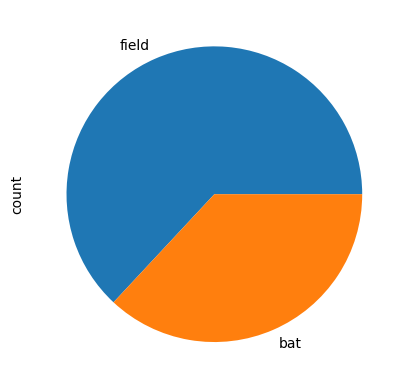

In [17]:
ipl_matches['TossDecision'].value_counts().plot(kind = 'pie')

3. **How many matches each team has played**

In [20]:
( ipl_matches['Team1'].value_counts() + ipl_matches['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [22]:
# here we got the count of matches played by each team by adding the count of Team1 and Team2 columns and since it returned a series so we used sort_values() method to sort it in descending order .

In [23]:
# We can observe that value_counts() function is very important and useful in data analysis .

#### `sort_values`
- works on both series and dataframe objects .
- it is used to sort the dataframe based on the values of a particular column .
- by default it sorts in ascending order , we can use ascending=False argument to sort in descending order .

In [24]:
x = pd.Series([12,14,1,56,89])
x

0    12
1    14
2     1
3    56
4    89
dtype: int64

In [26]:
x.sort_values(ascending=False)

4    89
3    56
1    14
0    12
2     1
dtype: int64

In [27]:
movies_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [36]:
movies_df['title_x'].sort_values()
# but it returns a series object .

1498          16 December (film)
1021                 1920 (film)
287                 1920: London
723       1920: The Evil Returns
1039            1971 (2007 film)
                  ...           
778     Zindagi Na Milegi Dobara
670            Zindagi Tere Naam
756                     Zokkomon
939        Zor Lagaa Ke...Haiya!
1623                    Zubeidaa
Name: title_x, Length: 1629, dtype: object

In [35]:
movies_df.sort_values('title_x')

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [33]:
# so we'll do it like this to get a dataframe object .
movies_df.sort_values(by='title_x', ascending=False)
# by attribute we can specify the column name on which we want to sort the dataframe .

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)


In [37]:
movies_df.sort_values(by=['year_of_release', 'imdb_rating'], ascending=[False, True])
# Sort the DataFrame first by 'year_of_release' in descending order.
# If there are ties (same year), then sort those rows by 'imdb_rating' in ascending order.
# This is called lexicographical sorting and avoids conflicts by using the order of columns.

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
70,Keep Safe Distance (film),tt8876008,NaN,https://en.wikipedia.org/wiki/Keep_Safe_Distan...,Keep Safe Distance,Keep Safe Distance,0,2019,128,Action|Thriller,0.0,0,Keep Safe Distance is an upcoming Indian thril...,Keep Safe Distance is an upcoming Indian thril...,NaN,Shahbaaz Khan|Adi Irani|Vikas Anand|Kiran Kuma...,NaN,NaN
30,Student of the Year 2,tt7255568,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Student_of_the_Y...,Student of the Year 2,Student of the Year 2,0,2019,146,Drama|Romance|Sport,2.5,12671,A student must face off against bullies and ov...,A student must face off against bullies and ov...,NaN,Tiger Shroff|Ananya Panday|Tara Sutaria|Aditya...,NaN,10 May 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
78,Dabangg 3,tt7059844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Dabangg_3,Dabangg 3,Dabangg 3,0,2019,160,Action,3.0,15000,Third installment of the Dabanng film series.,Third installment of the Dabanng film series.,NaN,Salman Khan|Sonakshi Sinha|Sudeep|Mahesh Manjr...,NaN,NaN
71,Pagalpanti (2019 film),tt9495690,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Pagalpanti_(2019...,Pagalpanti (Hindi),Pagalpanti,0,2019,149,Action|Comedy,3.1,2100,A tourist group from India sets out on a vacat...,A tourist group from India sets out on a vacat...,NaN,Kriti Kharbanda|John Abraham|Ileana D'Cruz|Ani...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,Chandni Bar,tt0267363,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Chandni_Bar,Chandni Bar,Chandni Bar,0,2001,150,Crime|Drama,7.6,2284,Mumtaz is a village girl whose family is kille...,A displaced woman is forced to become a beer-b...,NaN,Tabu|Atul Kulkarni|Rajpal Yadav|Shri Vallabh V...,7 wins & 14 nominations,28 September 2001 (India)
1607,Nayak (2001 Hindi film),tt0291376,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Nayak_(2001_Hind...,Nayak: The Real Hero,Nayak: The Real Hero,0,2001,187,Action|Drama|Thriller,7.8,12522,Employed as a camera-man at a popular televisi...,A man accepts a challenge by the chief ministe...,Fight the power,Anil Kapoor|Rani Mukerji|Amrish Puri|Johnny Le...,2 nominations,7 September 2001 (India)
1567,Lagaan,tt0169102,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Lagaan,Lagaan: Once Upon a Time in India,Lagaan: Once Upon a Time in India,0,2001,224,Adventure|Drama|Musical,8.1,95686,This is the story about the resilience shown b...,The people of a small village in Victorian Ind...,Once upon a time in India,Aamir Khan|Gracy Singh|Rachel Shelley|Paul Bla...,Nominated for 1 Oscar,15 June 2001 (USA)
1568,Lagaan,tt0169102,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Lagaan:_Once_Upo...,Lagaan: Once Upon a Time in India,Lagaan: Once Upon a Time in India,0,2001,224,Adventure|Drama|Musical,8.1,95686,This is the story about the resilience shown b...,The people of a small village in Victorian Ind...,Once upon a time in India,Aamir Khan|Gracy Singh|Rachel Shelley|Paul Bla...,Nominated for 1 Oscar,15 June 2001 (USA)


In [56]:
# Here we can also pass a list of column names to sort by multiple columns at once and also skip the use of by attribute .
movies_df.sort_values(['year_of_release', 'imdb_rating' , 'title_x' ],ascending=[True,False , True])
# Here we sorted the dataframe first by year_of_release in ascending order , and when there are ties (same year) then those rows are sorted by imdb_rating in descending order and if there are still ties then those rows are sorted by title_x in ascending order .

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1571,Dil Chahta Hai,tt0292490,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Dil_Chahta_Hai,Dil Chahta Hai,Dil Chahta Hai,0,2001,183,Comedy|Drama|Romance,8.1,62313,Three young men Akash Sameer and Siddharth a...,Three inseparable childhood friends are just o...,Welcome to a summer of their lives you will ne...,Aamir Khan|Saif Ali Khan|Akshaye Khanna|Preity...,22 wins & 37 nominations,10 August 2001 (India)
1567,Lagaan,tt0169102,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Lagaan,Lagaan: Once Upon a Time in India,Lagaan: Once Upon a Time in India,0,2001,224,Adventure|Drama|Musical,8.1,95686,This is the story about the resilience shown b...,The people of a small village in Victorian Ind...,Once upon a time in India,Aamir Khan|Gracy Singh|Rachel Shelley|Paul Bla...,Nominated for 1 Oscar,15 June 2001 (USA)
1568,Lagaan,tt0169102,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Lagaan:_Once_Upo...,Lagaan: Once Upon a Time in India,Lagaan: Once Upon a Time in India,0,2001,224,Adventure|Drama|Musical,8.1,95686,This is the story about the resilience shown b...,The people of a small village in Victorian Ind...,Once upon a time in India,Aamir Khan|Gracy Singh|Rachel Shelley|Paul Bla...,Nominated for 1 Oscar,15 June 2001 (USA)
1607,Nayak (2001 Hindi film),tt0291376,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Nayak_(2001_Hind...,Nayak: The Real Hero,Nayak: The Real Hero,0,2001,187,Action|Drama|Thriller,7.8,12522,Employed as a camera-man at a popular televisi...,A man accepts a challenge by the chief ministe...,Fight the power,Anil Kapoor|Rani Mukerji|Amrish Puri|Johnny Le...,2 nominations,7 September 2001 (India)
1589,Chandni Bar,tt0267363,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Chandni_Bar,Chandni Bar,Chandni Bar,0,2001,150,Crime|Drama,7.6,2284,Mumtaz is a village girl whose family is kille...,A displaced woman is forced to become a beer-b...,NaN,Tabu|Atul Kulkarni|Rajpal Yadav|Shri Vallabh V...,7 wins & 14 nominations,28 September 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Pagalpanti (2019 film),tt9495690,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Pagalpanti_(2019...,Pagalpanti (Hindi),Pagalpanti,0,2019,149,Action|Comedy,3.1,2100,A tourist group from India sets out on a vacat...,A tourist group from India sets out on a vacat...,NaN,Kriti Kharbanda|John Abraham|Ileana D'Cruz|Ani...,NaN,NaN
78,Dabangg 3,tt7059844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Dabangg_3,Dabangg 3,Dabangg 3,0,2019,160,Action,3.0,15000,Third installment of the Dabanng film series.,Third installment of the Dabanng film series.,NaN,Salman Khan|Sonakshi Sinha|Sudeep|Mahesh Manjr...,NaN,NaN
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
30,Student of the Year 2,tt7255568,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Student_of_the_Y...,Student of the Year 2,Student of the Year 2,0,2019,146,Drama|Romance|Sport,2.5,12671,A student must face off against bullies and ov...,A student must face off against bullies and ov...,NaN,Tiger Shroff|Ananya Panday|Tara Sutaria|Aditya...,NaN,10 May 2019 (USA)


In [68]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [46]:
students.sort_values(by= 'name')
# by default, it places nan values at the end , we can use na_position='first' argument to place them at the beginning .

,name,college,branch,cgpa,package
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [50]:
students.sort_values('name',na_position='first',ascending=False,inplace=True)
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


#### `rank()`

- only works on series objects .
- it is used to get the rank of each value in a series .
- by default it assigns the average rank to the tied values , we can use method='min' argument to assign the minimum rank to the tied values .
- by default it ranks in ascending order , we can use ascending=False argument to rank in descending order .
- when the value is same for multiple rows , it assigns the same rank to all those rows and skips the next ranks accordingly . ex: if two rows have same value and they are ranked 2nd , then the next rank will be 4th .

In [58]:
batsman_runs

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [64]:
batsman_runs['batting_rank'] = batsman_runs['batsman_run'].rank(ascending=False)
batsman_runs.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
570,V Pratap Singh,0,594.0
63,Abdur Razzak,0,594.0
562,U Kaul,0,594.0
65,Akash Deep,0,594.0


#### `sort_index()`

- works on both series and dataframe objects .
- it is used to sort the dataframe based on the index (row labels) .

In [65]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [67]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [69]:
movies_df.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


#### `set_index()`
- works only on dataframe objects .
- it is used to set a particular column as index (row labels) of the dataframe .
- by default, it returns a new dataframe with the updated index , leaving the original dataframe unchanged .
- if we want to set multiple columns as index , we can pass a list of column names to it .

In [74]:
batsman_runs.set_index('batter',inplace=True)
batsman_runs

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


#### `reset_index()`
- works on both series and dataframe objects .
- it is used to reset the index (row labels) of the dataframe to default integer index .

In [75]:
batsman_runs.reset_index(inplace=True)
batsman_runs

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [79]:
batsman_runs.set_index('batter',inplace=True)

In [80]:
# how to replace existing index without loosing .
# means if we set batter as index and then want to set batting_rank as index and if we do it directly like batsman.set_index('batting_rank') then we will loose batter index .
# so for that we will first reset the index to default integer index by using reset_index() and then set batting_rank as index .
batsman_runs.reset_index().set_index('batting_rank')

,batter,batsman_run
batting_rank,,
166.5,A Ashish Reddy,280
226.0,A Badoni,161
535.0,A Chandila,4
329.0,A Chopra,53
402.5,A Choudhary,25
...,...,...
594.0,Yash Dayal,0
343.0,Yashpal Singh,47
547.5,Younis Khan,3


In [84]:
# series to dataframe using reset_index
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [87]:
x = marks_series.reset_index()
x

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


In [88]:
type(x)
# so it converted series to dataframe .

pandas.core.frame.DataFrame

#### `rename()`

- works on both series and dataframe objects .
- it is used to rename the index (row labels) or columns of the dataframe .

In [17]:
movies_df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [18]:
movies_df.set_index('title_x',inplace=True)

In [20]:
movies_df.rename(columns={'imdb_id':'imdb', 'poster_path':'link'},inplace=True)
movies_df

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [21]:
# We can also rename index (row labels) using rename() method .
movies_df.rename(index={'Uri: The Surgical Strike':'uri', 'Manikarnika: The Queen of Jhansi':'Manikarnika'},inplace=True)

In [22]:
movies_df

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


#### `unique()`
- works only on series objects .
- it is used to get the unique values in a column .
- unique also returns np.nan as a unique value .

In [24]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
print(temp)

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64


In [43]:
temp.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [40]:
len(temp.unique())

6

In [41]:
temp.nunique()      # to get the count of unique values in the series but it does not consider np.nan as a unique value by default .

5

#### `nunique()`
- works only on series objects .
- it is used to get the count of unique values in a column .
- it does not consider np.nan as a unique value by default , we can use dropna=False argument to consider np.nan as a unique value .

In [42]:
print( len(ipl_matches['Season'].unique()) )
print(ipl_matches['Season'].unique().size)
print(ipl_matches['Season'].unique().shape[0])

15
15
15


#### `isnull()`
- works on both series and dataframe objects .
- it is used to check for null values in a column or dataframe .
- it returns a boolean series or dataframe indicating whether each value is null (NaN) or not .

In [49]:
students['name'][students['name'].isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

#### `notnull()`
- works on both series and dataframe objects .
- it is used to check for non-null values in a column or dataframe .
- it returns a boolean series or dataframe indicating whether each value is not null (not NaN) or not .

In [51]:
students['name'][students['name'].notnull()]

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

#### `hasnans`
- works only on series objects .
- it is used to check if there are any null values in a column or dataframe .
- it returns a boolean value indicating whether there are any null values or not .

In [52]:
students['name'].hasnans

True

- working with DataFrames

In [53]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [57]:
students.isnull()

,name,college,branch,cgpa,package
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,True,False,False,False
5,True,False,False,False,False
6,False,False,False,False,False
7,True,True,False,False,False
8,False,True,False,False,True
9,True,False,True,True,True


In [58]:
students.notnull()

,name,college,branch,cgpa,package
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,False,False,False,False,False
4,True,False,True,True,True
5,False,True,True,True,True
6,True,True,True,True,True
7,False,False,True,True,True
8,True,False,True,True,False
9,False,True,False,False,False


In [ ]:
# students.hasnans
# does not work for dataframe object , it only works for series object .

#### `dropna()`
- works on both series and dataframe objects .
- it is used to drop the null values from a column or dataframe .
- thresh argument is used to specify the minimum number of non-null values required to keep a row or column .
- subset argument is used to specify a list of columns to consider for dropping null values .

In [61]:
students['name'].dropna()

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [63]:
students.dropna()
# by default, it drops the rows having any null value (because how = 'any' is default), we can use how='all' argument to drop the rows having all null values .

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [72]:
students.dropna(how='all')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [74]:
students.dropna(subset=['name'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


In [75]:
students.dropna(subset=['name','college'])
# here it drops the rows having null values in either name or college column .

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


#### `fillna()`
- works on both series and dataframe objects .
- it is used to fill the null values in a column or dataframe with a specific value or method .
- method argument is used to specify the method to use for filling null values . it can be 'ffill' (forward fill) or 'bfill' (backward fill) .
- limit argument is used to specify the maximum number of consecutive null values to fill .

In [77]:
students['name'].fillna('unknown').hasnans

False

In [78]:
students['package'].fillna(students['package'].mean())

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

In [82]:
students['name'].fillna(method='bfill')

C:\Users\RITESH\AppData\Local\Temp\ipykernel_18236\1533166429.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].fillna(method='bfill')


0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

In [88]:
# Note: passing `method` to `fillna` is deprecated. Prefer `.bfill()` and ffill()`.
students['name'].bfill()
# bfill is used to fill the null values with before non-null value and

0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

#### `drop_duplicates()`
- works on both series and dataframe objects .
- it is used to drop the duplicate values from a column or dataframe .
- by default, it keeps the first occurrence of the duplicate values and drops the rest , we can use keep='last' argument to keep the last occurrence of the duplicate values and drop the rest .
- subset argument is used to specify a list of columns to consider for dropping duplicate values .

In [91]:
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [96]:
# so duplicated tells us which rows are duplicate and drop_duplicates() drops those duplicate rows .
print ( marks.duplicated() )
print("\n" , marks.duplicated().sum() )
# it provides a boolean series indicating whether each row is a duplicate or not and also the count of duplicate rows in the second print statement .

0    False
1    False
2    False
3    False
4     True
dtype: bool

 1


In [97]:
temp = pd.Series([1,1,1,2,3,3,4,4])
temp.drop_duplicates()

0    1
3    2
4    3
6    4
dtype: int64

In [98]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


* find the last match played by virat kohli in Delhi ??

In [99]:
ipl_matches['all_players'] = ipl_matches['Team1Players'] + ipl_matches['Team2Players']
ipl_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ..."


In [100]:
def did_kohli_play(players_list):
  return 'V Kohli' in players_list

In [102]:
ipl_matches['did_kohli_play'] = ipl_matches['all_players'].apply(did_kohli_play)
ipl_matches[(ipl_matches['City'] == 'Delhi') & (ipl_matches['did_kohli_play'] == True)].drop_duplicates(subset=['City','did_kohli_play'],keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


#### `drop()`
- works on both series and dataframe objects .
- it is used to drop a specific row or column from a dataframe .
- axis argument is used to specify whether to drop a row (axis=0) or a column (axis=1) .

In [106]:
temp = pd.Series([10,2,3,16,45,78,10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [109]:
temp.drop(index=[0,6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [110]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [111]:
students.drop(columns=['branch','cgpa'],inplace=True)

In [112]:
students

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [188]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once:

In [189]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [190]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [ ]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

In [ ]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [ ]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [ ]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

## Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels. For example:

In [ ]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [ ]:
d5["public"]

In [ ]:
d5["public", "hobby"]  # Same result as d5["public"]["hobby"]

## Dropping a level
Let's look at `d5` again:

In [ ]:
d5

There are two levels of columns, and two levels of indices. We can drop a column level by calling `droplevel()` (the same goes for indices):

In [ ]:
d5.columns = d5.columns.droplevel(level = 0)
d5

## Transposing
You can swap columns and indices using the `T` attribute:

In [ ]:
d6 = d5.T
d6

## Stacking and unstacking levels
Calling the `stack()` method will push the lowest column level after the lowest index:

In [ ]:
d7 = d6.stack()
d7

Note that many `NaN` values appeared. This makes sense because many new combinations did not exist before (eg. there was no `bob` in `London`).

Calling `unstack()` will do the reverse, once again creating many `NaN` values.

In [ ]:
d8 = d7.unstack()
d8

If we call `unstack` again, we end up with a `Series` object:

In [ ]:
d9 = d8.unstack()
d9

The `stack()` and `unstack()` methods let you select the `level` to stack/unstack. You can even stack/unstack multiple levels at once:

In [ ]:
d10 = d9.unstack(level = (0,1))
d10

## Most methods return modified copies
As you may have noticed, the `stack()` and `unstack()` methods do not modify the object they apply to. Instead, they work on a copy and return that copy. This is true of most methods in pandas.

## Accessing rows
Let's go back to the `people` `DataFrame`:

In [ ]:
people

The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [ ]:
people.loc["charles"]

You can also access rows by integer location using the `iloc` attribute:

In [ ]:
people.iloc[2]

You can also get a slice of rows, and this returns a `DataFrame` object:

In [ ]:
people.iloc[1:3]

Finally, you can pass a boolean array to get the matching rows:

In [ ]:
people[np.array([True, False, True])]

This is most useful when combined with boolean expressions:

In [ ]:
people[people["birthyear"] < 1990]

## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [ ]:
people

In [ ]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

In [ ]:
birthyears

When you add a new colum, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored:

In [ ]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [ ]:
people.insert(1, "height", [172, 181, 185])
people

## Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [ ]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

Note that you cannot access columns created within the same assignment:

In [ ]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

The solution is to split this assignment in two consecutive assignments:

In [ ]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

Having to create a temporary variable `d6` is not very convenient. You may want to just chain the assigment calls, but it does not work because the `people` object is not actually modified by the first assignment:

In [ ]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

But fear not, there is a simple solution. You can pass a function to the `assign()` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter:

In [ ]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

Problem solved!

## Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [ ]:
people.eval("weight / (height/100) ** 2 > 25")

Assignment expressions are also supported. Let's set `inplace=True` to directly modify the `DataFrame` rather than getting a modified copy:

In [ ]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

You can use a local or global variable in an expression by prefixing it with `'@'`:

In [ ]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

## Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [ ]:
people.query("age > 30 and pets == 0")

## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [ ]:
people.sort_index(ascending=False)

Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [ ]:
people.sort_index(axis=1, inplace=True)
people

To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [ ]:
people.sort_values(by="age", inplace=True)
people

## Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method:

In [ ]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

You can pass extra arguments supported by matplotlib's functions. For example, we can create scatterplot and pass it a list of sizes using the `s` argument of matplotlib's `scatter()` function:

In [ ]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

Again, there are way too many options to list here: the best option is to scroll through the [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) page in pandas' documentation, find the plot you are interested in and look at the example code.

## Operations on `DataFrame`s
Although `DataFrame`s do not try to mimick NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [ ]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [ ]:
np.sqrt(grades)

Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [ ]:
grades + 1

Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [ ]:
grades >= 5

Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [ ]:
grades.mean()

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [ ]:
(grades > 5).all()

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [ ]:
(grades > 5).all(axis = 1)

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [ ]:
(grades == 10).any(axis = 1)

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), pandas attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's subtract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [ ]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

We subtracted `7.75` from all September grades, `8.75` from October grades and `7.50` from November grades. It is equivalent to subtracting this `DataFrame`:

In [ ]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

If you want to subtract the global mean from every grade, here is one way to do it:

In [ ]:
grades - grades.values.mean() # subtracts the global mean (8.00) from all grades

## Automatic alignment
Similar to `Series`, when operating on multiple `DataFrame`s, pandas automatically aligns them by row index label, but also by column names. Let's create a `DataFrame` with bonus points for each person from October to December:

In [ ]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

In [ ]:
grades + bonus_points

Looks like the addition worked in some cases but way too many elements are now empty. That's because when aligning the `DataFrame`s, some columns and rows were only present on one side, and thus they were considered missing on the other side (`NaN`). Then adding `NaN` to a number results in `NaN`, hence the result.

## Handling missing data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
 
Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna()` method:

In [ ]:
(grades + bonus_points).fillna(0)

It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros:

In [ ]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

That's much better: although we made up some data, we have not been too unfair.

Another way to handle missing data is to interpolate. Let's look at the `bonus_points` `DataFrame` again:

In [ ]:
bonus_points

Now let's call the `interpolate` method. By default, it interpolates vertically (`axis=0`), so let's tell it to interpolate horizontally (`axis=1`).

In [ ]:
bonus_points.interpolate(axis=1)

Bob had 0 bonus points in October, and 2 in December. When we interpolate for November, we get the mean: 1 bonus point. Colin had 1 bonus point in November, but we do not know how many bonus points he had in September, so we cannot interpolate, this is why there is still a missing value in October after interpolation. To fix this, we can set the September bonus points to 0 before interpolation.

In [ ]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

Great, now we have reasonable bonus points everywhere. Let's find out the final grades:

In [ ]:
grades + better_bonus_points

It is slightly annoying that the September column ends up on the right. This is because the `DataFrame`s we are adding do not have the exact same columns (the `grades` `DataFrame` is missing the `"dec"` column), so to make things predictable, pandas orders the final columns alphabetically. To fix this, we can simply add the missing column before adding:

In [ ]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

There's not much we can do about December and Colin: it's bad enough that we are making up bonus points, but we can't reasonably make up grades (well I guess some teachers probably do). So let's call the `dropna()` method to get rid of rows that are full of `NaN`s:

In [ ]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

Now let's remove columns that are full of `NaN`s by setting the `axis` argument to `1`:

In [ ]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

## Aggregating with `groupby`
Similar to the SQL language, pandas allows grouping your data into groups to run calculations over each group.

First, let's add some extra data about each person so we can group them, and let's go back to the `final_grades` `DataFrame` so we can see how `NaN` values are handled:

In [ ]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

Now let's group data in this `DataFrame` by hobby:

In [ ]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

We are ready to compute the average grade per hobby:

In [ ]:
grouped_grades.mean()

That was easy! Note that the `NaN` values have simply been skipped when computing the means.

## Pivot tables
Pandas supports spreadsheet-like [pivot tables](https://en.wikipedia.org/wiki/Pivot_table) that allow quick data summarization. To illustrate this, let's create a simple `DataFrame`:

In [ ]:
bonus_points

In [ ]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

Now we can call the `pd.pivot_table()` function for this `DataFrame`, asking to group by the `name` column. By default, `pivot_table()` computes the mean of each numeric column:

In [ ]:
pd.pivot_table(more_grades, index="name")

We can change the aggregation function by setting the `aggfunc` argument, and we can also specify the list of columns whose values will be aggregated:

In [ ]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

We can also specify the `columns` to aggregate over horizontally, and request the grand totals for each row and column by setting `margins=True`:

In [ ]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

Finally, we can specify multiple index or column names, and pandas will create multi-level indices:

In [ ]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

## Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [ ]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

The `head()` method returns the top 5 rows:

In [ ]:
large_df.head()

Of course there's also a `tail()` function to view the bottom 5 rows. You can pass the number of rows you want:

In [ ]:
large_df.tail(n=2)

The `info()` method prints out a summary of each columns contents:

In [ ]:
large_df.info()

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [ ]:
large_df.describe()

# Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [ ]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

## Saving
Let's save it to CSV, HTML and JSON:

In [ ]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

Done! Let's take a peek at what was saved:

In [ ]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


Note that the index is saved as the first column (with no name) in a CSV file, as `<th>` tags in HTML and as keys in JSON.

Saving to other formats works very similarly, but some formats require extra libraries to be installed. For example, saving to Excel requires the openpyxl library:

In [ ]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

## Loading
Now let's load our CSV file back into a `DataFrame`:

In [ ]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

As you might guess, there are similar `read_json`, `read_html`, `read_excel` functions as well.  We can also read data straight from the Internet. For example, let's load the top 1,000 U.S. cities from github:

In [ ]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

There are more options available, in particular regarding datetime format. Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) for more details.

# Combining `DataFrame`s

## SQL-like joins
One powerful feature of pandas is it's ability to perform SQL-like joins on `DataFrame`s. Various types of joins are supported: inner joins, left/right outer joins and full joins. To illustrate this, let's start by creating a couple simple `DataFrame`s:

In [ ]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

In [ ]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

Now let's join these `DataFrame`s using the `merge()` function:

In [ ]:
pd.merge(left=city_loc, right=city_pop, on="city")

Note that both `DataFrame`s have a column named `state`, so in the result they got renamed to `state_x` and `state_y`.

Also, note that Cleveland, Salt Lake City and Houston were dropped because they don't exist in *both* `DataFrame`s. This is the equivalent of a SQL `INNER JOIN`. If you want a `FULL OUTER JOIN`, where no city gets dropped and `NaN` values are added, you must specify `how="outer"`:

In [ ]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

Of course `LEFT OUTER JOIN` is also available by setting `how="left"`: only the cities present in the left `DataFrame` end up in the result. Similarly, with `how="right"` only cities in the right `DataFrame` appear in the result. For example:

In [ ]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

If the key to join on is actually in one (or both) `DataFrame`'s index, you must use `left_index=True` and/or `right_index=True`. If the key column names differ, you must use `left_on` and `right_on`. For example:

In [ ]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

## Concatenation
Rather than joining `DataFrame`s, we may just want to concatenate them. That's what `concat()` is for:

In [ ]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (eg. 3). Pandas handles this rather gracefully:

In [ ]:
result_concat.loc[3]

Or you can tell pandas to just ignore the index:

In [ ]:
pd.concat([city_loc, city_pop], ignore_index=True)

Notice that when a column does not exist in a `DataFrame`, it acts as if it was filled with `NaN` values. If we set `join="inner"`, then only columns that exist in *both* `DataFrame`s are returned:

In [ ]:
pd.concat([city_loc, city_pop], join="inner")

You can concatenate `DataFrame`s horizontally instead of vertically by setting `axis=1`:

In [ ]:
pd.concat([city_loc, city_pop], axis=1)

In this case it really does not make much sense because the indices do not align well (eg. Cleveland and San Francisco end up on the same row, because they shared the index label `3`). So let's reindex the `DataFrame`s by city name before concatenating:

In [ ]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

This looks a lot like a `FULL OUTER JOIN`, except that the `state` columns were not renamed to `state_x` and `state_y`, and the `city` column is now the index.

The `append()` method is a useful shorthand for concatenating `DataFrame`s vertically:

In [ ]:
city_loc.append(city_pop)

As always in pandas, the `append()` method does *not* actually modify `city_loc`: it works on a copy and returns the modified copy.

# Categories
It is quite frequent to have values that represent categories, for example `1` for female and `2` for male, or `"A"` for Good, `"B"` for Average, `"C"` for Bad. These categorical values can be hard to read and cumbersome to handle, but fortunately pandas makes it easy. To illustrate this, let's take the `city_pop` `DataFrame` we created earlier, and add a column that represents a category:

In [ ]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

Right now the `eco_code` column is full of apparently meaningless codes. Let's fix that. First, we will create a new categorical column based on the `eco_code`s:

In [ ]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

Now we can give each category a meaningful name:

In [ ]:
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

Note that categorical values are sorted according to their categorical order, *not* their alphabetical order:

In [ ]:
city_eco.sort_values(by="economy", ascending=False)

# What next?
As you probably noticed by now, pandas is quite a large library with *many* features. Although we went through the most important features, there is still a lot to discover. Probably the best way to learn more is to get your hands dirty with some real-life data. It is also a good idea to go through pandas' excellent [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), in particular the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html).